In [2]:
import repo.utils.mnist_reader as mnist_reader

X_train, y_train = mnist_reader.load_mnist('repo/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('repo/data/fashion', kind='t10k')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


In [3]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
import numpy as np

num_data_points = len(X_train)

X_train_new = []
y_train_new = []

for i in range(num_data_points):
    if y_train[i] == 5:
        X_train_new.append(X_train[i])
        y_train_new.append(0)
    elif y_train[i] == 7:
        X_train_new.append(X_train[i])
        y_train_new.append(1)



X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

X_train = X_train_new
y_train = y_train_new

X_train_og = X_train
y_train_og = y_train

print(X_train.shape)
print(y_train.shape)

(12000, 784)
(12000,)


In [5]:
num_samples_per_case = 1500

np.random.seed(42)

class_0_indices = np.where(y_train== 0)[0]
class_1_indices = np.where(y_train == 1)[0]

class_0_indices = np.random.choice(class_0_indices, num_samples_per_case, replace=False)
class_1_indices = np.random.choice(class_1_indices, num_samples_per_case, replace=False)

X_train_short = np.concatenate([X_train[class_0_indices], X_train[class_1_indices]])
y_train_short = np.concatenate([np.zeros(num_samples_per_case), np.ones(num_samples_per_case)])

indices = np.random.permutation(len(X_train_short))
X_train_short = X_train_short[indices]
y_train_short = y_train_short[indices]

X_train = X_train_short
y_train = y_train_short

print(X_train_short.shape)
print(y_train_short.shape)

# for i in range(6000):
    # print("Printing")
    # print(y_train_short[i])

# for i in range (6000):
#     if i == 3000:
#         print('halfway')
#     print(y_train[i])


(3000, 784)
(3000,)


In [6]:
import numpy as np

num_data_points = len(X_test)

X_test_new = []
y_test_new = []

for i in range(num_data_points):
    if y_test[i] == 5:
        X_test_new.append(X_test[i])
        y_test_new.append(0)
    elif y_test[i] == 7:
        X_test_new.append(X_test[i])
        y_test_new.append(1)

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

X_test = X_test_new
y_test = y_test_new

X_test_og = X_test
y_test_og = y_test

In [7]:
from sklearn.preprocessing import StandardScaler

# Assume X_train and X_test are your training and test feature matrices
scaler = StandardScaler()

# Fit on training data and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data using the same scaler (without refitting)
X_test = scaler.transform(X_test)


In [8]:
"""Select a probability in the range from 0.1 to 0.3 (e.g., you might pick 0.1, or 0.2, or 0.25,
 etc.). Fix this value, and call it p.
 Now, independently for each example in the training set, flip its label with probability p.
 This is called adding “label noise”. It makes the labels noisy and makes machine learning
 algorithms more likely to overfit"""

p = 0.2 # Probabilty

def flip_labels(y):
    y_noisy = y.copy()
    for i in range(len(y)):
        random_number = np.random.rand() #Random num between 0 and 1
        if random_number < p:
            y_noisy[i] = 1 - y_noisy[i]
    return y_noisy


y_train_noisy = flip_labels(y_train)


#Sanity check
same = 0
diff = 0
for i in range(len(y_train)):
    if y_train[i] == y_train_noisy[i]:
        same += 1
    else:
        diff += 1

print(same, diff)
print(diff / len(y_train))

2387 613
0.20433333333333334


# And now, we begin...

In [45]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

def k_fold_cross_validation(k, param_grid, training_features, labels):

    num_samples = training_features.shape[0]

    training_features_folds = []
    labels_folds = []

    # Split the data into k folds
    for i in range(k):
        training_features_folds.append(training_features[i * num_samples // k : (i + 1) * num_samples // k])
        labels_folds.append(labels[i * num_samples // k : (i + 1) * num_samples // k])


    best_error = float('inf')

    best_param_set = None

    for param_set in param_grid:

        print("param set:", param_set)

        sum_error = 0
        average_error = 0

        for i in range(k):
            
            training_features_fold = np.vstack([training_features_folds[j] for j in range(k) if j != i])
            training_target_fold = np.hstack([labels_folds[j] for j in range(k) if j != i])

            test_features = training_features_folds[i]
            test_target = labels_folds[i]

            mlp = MLPClassifier(hidden_layer_sizes=param_set['hidden_layer_sizes'], activation=param_set['non_linearity'], learning_rate_init=param_set['learning_rate_init'])
            # # To define
            mlp.fit(training_features_fold, training_target_fold)

            predictions = mlp.predict(test_features)

            accuracy = accuracy_score(test_target, predictions)

            error = 1 - accuracy

            sum_error = sum_error + error

        average_error = sum_error / (k)

        print("Average Error:", average_error)

        if average_error < best_error:
            print("New best error:", average_error)
            print("New best param set:", param_set)
            best_error = average_error
            best_param_set = param_set

    print("Best param set:", best_param_set)
    print("Best error:", best_error)

    return best_param_set

# Defining Possible Param sets

In [9]:
param_grid = [
    { 'hidden_layer_sizes': (30), 'non_linearity': 'relu', 'learning_rate_init': 0.001},
    { 'hidden_layer_sizes': (50), 'non_linearity': 'relu', 'learning_rate_init': 0.001},
    { 'hidden_layer_sizes': (50, 50), 'non_linearity': 'relu', 'learning_rate_init': 0.001},
    { 'hidden_layer_sizes': (30, 30), 'non_linearity': 'relu', 'learning_rate_init': 0.001},
    { 'hidden_layer_sizes': (30), 'non_linearity': 'logistic', 'learning_rate_init': 0.001},
    { 'hidden_layer_sizes': (50), 'non_linearity': 'logistic', 'learning_rate_init': 0.001},
    { 'hidden_layer_sizes': (50, 50), 'non_linearity': 'logistic', 'learning_rate_init': 0.001},
    { 'hidden_layer_sizes': (30, 30), 'non_linearity': 'logistic', 'learning_rate_init': 0.001},
     { 'hidden_layer_sizes': (30), 'non_linearity': 'relu', 'learning_rate_init': 0.01},
    { 'hidden_layer_sizes': (50), 'non_linearity': 'relu', 'learning_rate_init': 0.01},
    { 'hidden_layer_sizes': (50, 50), 'non_linearity': 'relu', 'learning_rate_init': 0.01},
    { 'hidden_layer_sizes': (30, 30), 'non_linearity': 'relu', 'learning_rate_init': 0.01},
    { 'hidden_layer_sizes': (30), 'non_linearity': 'logistic', 'learning_rate_init': 0.01},
    { 'hidden_layer_sizes': (50), 'non_linearity': 'logistic', 'learning_rate_init': 0.01},
    { 'hidden_layer_sizes': (50, 50), 'non_linearity': 'logistic', 'learning_rate_init': 0.01},
    { 'hidden_layer_sizes': (30, 30), 'non_linearity': 'logistic', 'learning_rate_init': 0.01},
]
best_param_set = k_fold_cross_validation(5, param_grid, X_train, y_train_noisy)


param set: {'hidden_layer_sizes': 30, 'non_linearity': 'relu', 'learning_rate_init': 0.001}


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Error: 0.3166666666666667
New best error: 0.3166666666666667
New best param set: {'hidden_layer_sizes': 30, 'non_linearity': 'relu', 'learning_rate_init': 0.001}
param set: {'hidden_layer_sizes': 50, 'non_linearity': 'relu', 'learning_rate_init': 0.001}


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Error: 0.31433333333333335
New best error: 0.31433333333333335
New best param set: {'hidden_layer_sizes': 50, 'non_linearity': 'relu', 'learning_rate_init': 0.001}
param set: {'hidden_layer_sizes': (50, 50), 'non_linearity': 'relu', 'learning_rate_init': 0.001}
Average Error: 0.3196666666666667
param set: {'hidden_layer_sizes': (30, 30), 'non_linearity': 'relu', 'learning_rate_init': 0.001}
Average Error: 0.3286666666666666
param set: {'hidden_layer_sizes': 30, 'non_linearity': 'logistic', 'learning_rate_init': 0.001}


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Error: 0.30100000000000005
New best error: 0.30100000000000005
New best param set: {'hidden_layer_sizes': 30, 'non_linearity': 'logistic', 'learning_rate_init': 0.001}
param set: {'hidden_layer_sizes': 50, 'non_linearity': 'logistic', 'learning_rate_init': 0.001}


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Error: 0.31799999999999995
param set: {'hidden_layer_sizes': (50, 50), 'non_linearity': 'logistic', 'learning_rate_init': 0.001}


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Error: 0.32300000000000006
param set: {'hidden_layer_sizes': (30, 30), 'non_linearity': 'logistic', 'learning_rate_init': 0.001}


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Error: 0.34233333333333327
param set: {'hidden_layer_sizes': 30, 'non_linearity': 'relu', 'learning_rate_init': 0.01}
Average Error: 0.33099999999999996
param set: {'hidden_layer_sizes': 50, 'non_linearity': 'relu', 'learning_rate_init': 0.01}
Average Error: 0.3173333333333333
param set: {'hidden_layer_sizes': (50, 50), 'non_linearity': 'relu', 'learning_rate_init': 0.01}
Average Error: 0.337
param set: {'hidden_layer_sizes': (30, 30), 'non_linearity': 'relu', 'learning_rate_init': 0.01}
Average Error: 0.32799999999999996
param set: {'hidden_layer_sizes': 30, 'non_linearity': 'logistic', 'learning_rate_init': 0.01}
Average Error: 0.321
param set: {'hidden_layer_sizes': 50, 'non_linearity': 'logistic', 'learning_rate_init': 0.01}
Average Error: 0.311
param set: {'hidden_layer_sizes': (50, 50), 'non_linearity': 'logistic', 'learning_rate_init': 0.01}
Average Error: 0.3173333333333333
param set: {'hidden_layer_sizes': (30, 30), 'non_linearity': 'logistic', 'learning_rate_init': 0.

# Atlast, we have arrieved to varying different hyperparams

# Varying hidden layer sizes (one hidden layer)

In [19]:
hidden_layer_sizes = [5,10,20,30,40,50,60,70,80]

training_errors = []
testing_errors = []

for hidden_layer in hidden_layer_sizes:

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='relu')
    
    mlp.fit(X_train, y_train_noisy)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

    print("Training error:", 1 - training_accuracy)
    print("Testing error:", 1 - testing_accuracy)


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.16166666666666663
Testing error: 0.18700000000000006


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.19533333333333336
Testing error: 0.20350000000000001


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.21299999999999997


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.1805


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.1865


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.1855


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.18400000000000005


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.1735
Training error: 0.20433333333333337
Testing error: 0.16749999999999998


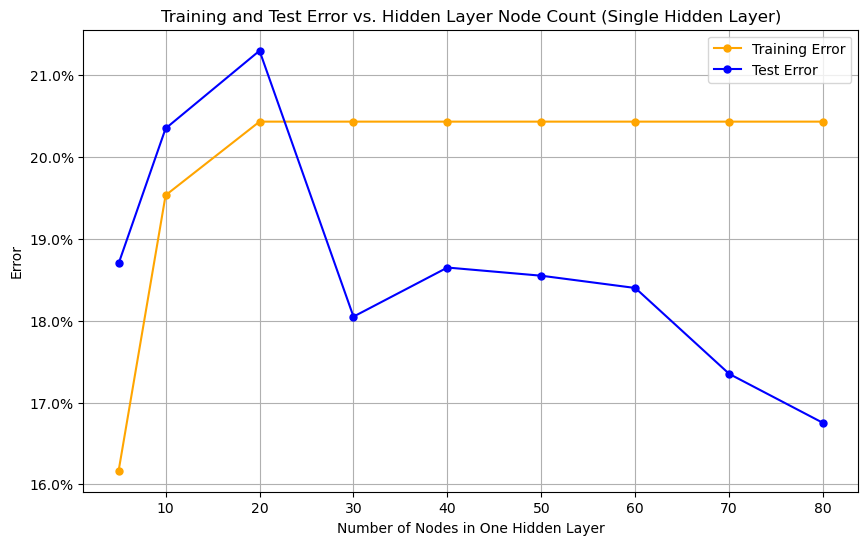

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_errors(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(hidden_layer_sizes, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(hidden_layer_sizes, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Number of Nodes in One Hidden Layer')
    plt.ylabel('Error')
    plt.legend()

    # plt.xscale('log')


    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

plot_errors(training_errors, testing_errors, "Training and Test Error vs. Hidden Layer Node Count (Single Hidden Layer)")

In [21]:
hidden_layer_sizes = [(5,5), (10,10), (20,20), (30,30), (40,40), (50,50), (60,60), (70,70), (80,80)]

training_errors = []
testing_errors = []

for hidden_layer in hidden_layer_sizes:

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='relu')
    
    mlp.fit(X_train, y_train_noisy)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

    print("Training error:", 1 - training_accuracy)
    print("Testing error:", 1 - testing_accuracy)


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.18400000000000005
Testing error: 0.21950000000000003


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20099999999999996
Testing error: 0.23450000000000004
Training error: 0.20433333333333337
Testing error: 0.22150000000000003
Training error: 0.20433333333333337
Testing error: 0.1765
Training error: 0.20433333333333337
Testing error: 0.18600000000000005
Training error: 0.20433333333333337
Testing error: 0.1905
Training error: 0.20433333333333337
Testing error: 0.1945
Training error: 0.20433333333333337
Testing error: 0.18100000000000005
Training error: 0.20433333333333337
Testing error: 0.1745


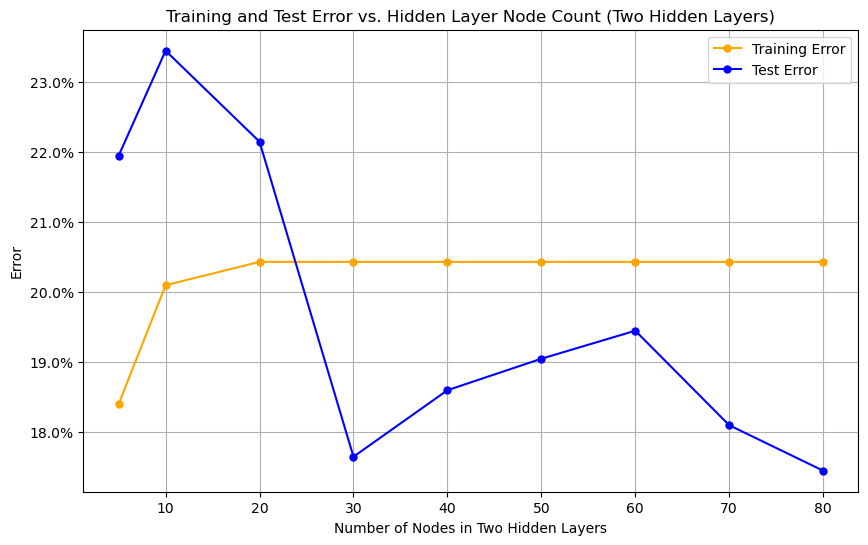

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

dummy_hidden_layer_sizes = [5,10,20,30,40,50,60,70,80]

def plot_errors(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dummy_hidden_layer_sizes, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(dummy_hidden_layer_sizes, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Number of Nodes in Two Hidden Layers')
    plt.ylabel('Error')
    plt.legend()

    # plt.xscale('log')


    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

plot_errors(training_errors, testing_errors, "Training and Test Error vs. Hidden Layer Node Count (Two Hidden Layers)")

# Varying max iter

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

max_iterations = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
training_errors = []
testing_errors = []

for max_iteration in max_iterations:

    mlp = MLPClassifier(hidden_layer_sizes=50, activation='relu', max_iter=max_iteration)
    
    mlp.fit(X_train, y_train_noisy)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)


    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

    print("Training error:", 1 - training_accuracy)
    print("Testing error:", 1 - testing_accuracy)


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.07933333333333337
Testing error: 0.08150000000000002


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.10466666666666669
Testing error: 0.08299999999999996


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.15300000000000002
Testing error: 0.126


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.16833333333333333
Testing error: 0.135


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.19766666666666666
Testing error: 0.15649999999999997


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.18999999999999995
Testing error: 0.14800000000000002


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20599999999999996
Testing error: 0.20199999999999996


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20333333333333337
Testing error: 0.16300000000000003


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20466666666666666
Testing error: 0.18700000000000006
Training error: 0.20433333333333337
Testing error: 0.18100000000000005


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(len(training_errors))
print(len(testing_errors))
print(training_errors)
print(testing_errors)

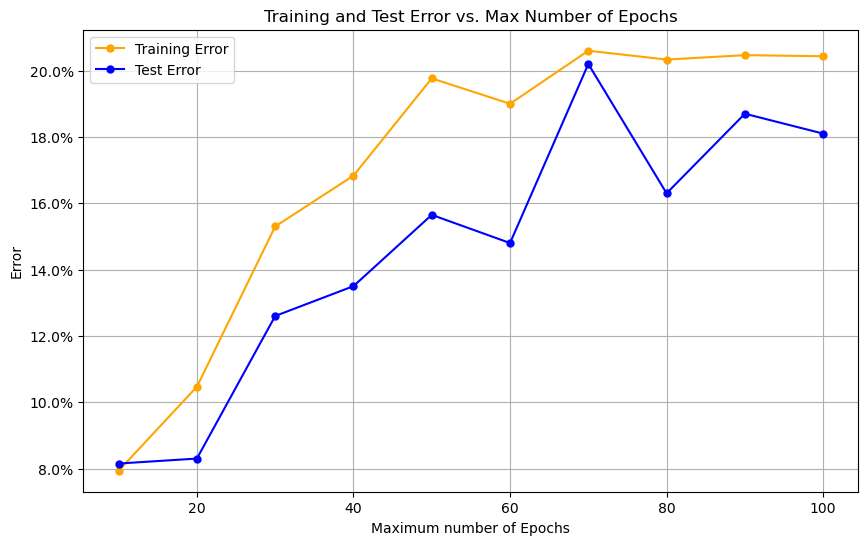

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_errors(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(max_iterations, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(max_iterations, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Maximum number of Epochs')
    plt.ylabel('Error')
    plt.legend()

    # plt.xscale('log')


    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

plot_errors(training_errors, testing_errors, "Training and Test Error vs. Max Number of Epochs")

# Varying alpha values

In [32]:
alpha_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

training_errors = []
testing_errors = []

for alpha in alpha_values:

    mlp = MLPClassifier(hidden_layer_sizes=50, activation='relu', alpha=alpha)
    
    mlp.fit(X_train, y_train_noisy)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

    print("Training error:", 1 - training_accuracy)
    print("Testing error:", 1 - testing_accuracy)



c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.1745


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.17900000000000005


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.18500000000000005


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.20099999999999996
Training error: 0.20433333333333337
Testing error: 0.17400000000000004
Training error: 0.20099999999999996
Testing error: 0.1725


In [31]:
print(len(training_errors))
print(len(testing_errors))
print(len(alpha_values))

12
12
7


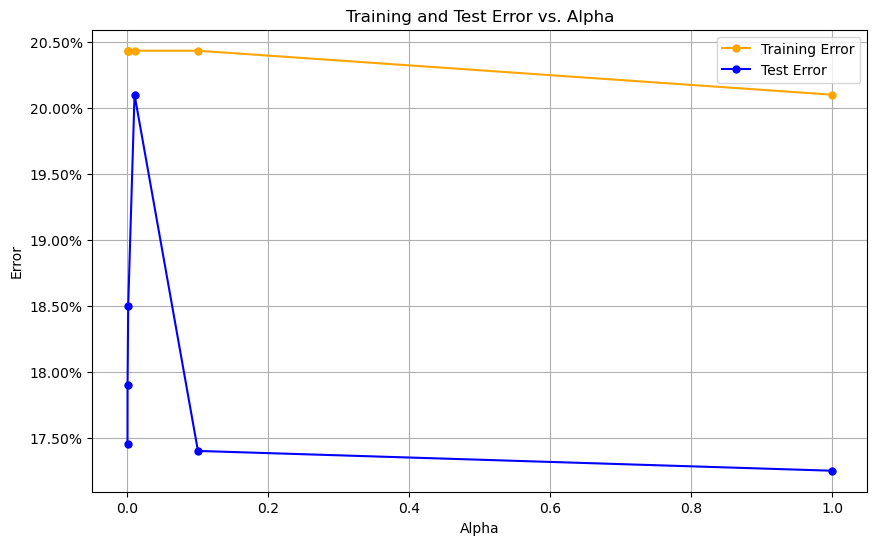

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_errors(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(alpha_values, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Alpha')
    plt.ylabel('Error')
    plt.legend()

    # plt.xscale('log')


    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

plot_errors(training_errors, testing_errors, "Training and Test Error vs. Alpha")

# Varying activation function

In [35]:
activations = ['relu', 'tanh', 'logistic']

training_errors = []
testing_errors = []

for activation in activations:

    mlp = MLPClassifier(hidden_layer_sizes=50, activation=activation)
    
    mlp.fit(X_train, y_train_noisy)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

    print("Training error:", 1 - training_accuracy)
    print("Testing error:", 1 - testing_accuracy)



c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.18700000000000006


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error: 0.20433333333333337
Testing error: 0.15749999999999997
Training error: 0.20299999999999996
Testing error: 0.16200000000000003


c:\Users\qwebs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


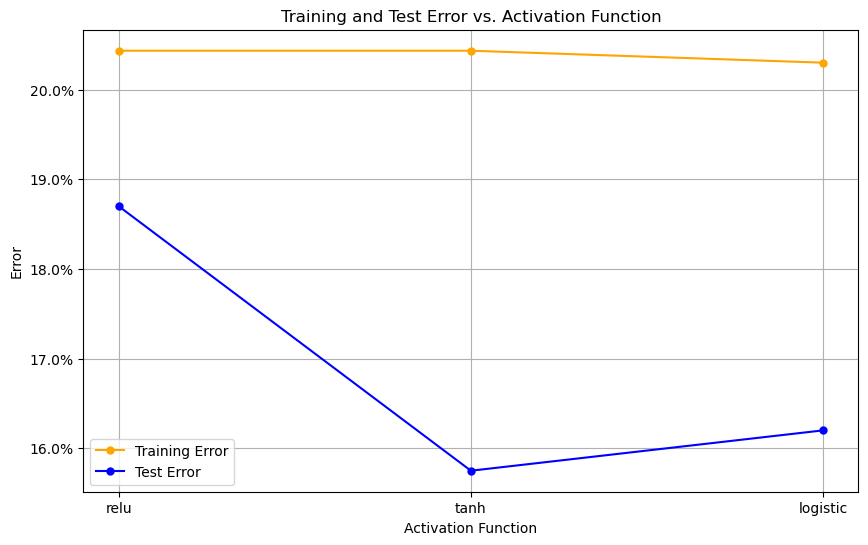

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_errors(training_errors, testing_errors, activations, title):
    # Create a figure for the plot
    plt.figure(figsize=(10, 6))
    
    # Plot training error
    plt.plot(activations, training_errors, label='Training Error', linestyle='-', color='orange', marker='o', markersize=5)
    
    # Plot test error
    plt.plot(activations, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)
    
    # Set title and labels
    plt.title(title)
    plt.xlabel('Activation Function')
    plt.ylabel('Error')
    
    # Add legend
    plt.legend()
    
    # Format the y-axis to display percentage
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
    
    # Show grid for better readability
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example call to the function
plot_errors(training_errors, testing_errors, activations, "Training and Test Error vs. Activation Function")
